In [1]:
import numpy as np 
import pandas as pd              # at first we have to import main libraries for this project
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Step 1: Import the Customer Churn Dataset

In [2]:
# here we have to upload a online_retail_customer csv file
df=pd.read_csv(r"E:\online_retail_customer_churn.csv") 
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [3]:
features_columns=df.columns
features_columns
# these are the columns or features are present in onlin_retail_customer_churn dataset

Index(['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Total_Spend',
       'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount',
       'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score',
       'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response',
       'Target_Churn'],
      dtype='object')

In [4]:
df.shape

(1000, 15)

In [5]:
df

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [6]:
df.dtypes

Customer_ID                     int64
Age                             int64
Gender                         object
Annual_Income                 float64
Total_Spend                   float64
Years_as_Customer               int64
Num_of_Purchases                int64
Average_Transaction_Amount    float64
Num_of_Returns                  int64
Num_of_Support_Contacts         int64
Satisfaction_Score              int64
Last_Purchase_Days_Ago          int64
Email_Opt_In                     bool
Promotion_Response             object
Target_Churn                     bool
dtype: object

# Step 2: Data Cleaning

In [7]:
df.isnull().sum()
# here we have to check if there was any missing values are there or not.If there we have to drop those rows or clean the data.

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [9]:
df.describe()
# df.describe means it gives all statistical values of our dataset file

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [10]:
unique_values=df.nunique()
unique_values
# df.nunique is to check how many unique values are present in the dataset.

Customer_ID                   1000
Age                             52
Gender                           3
Annual_Income                  972
Total_Spend                   1000
Years_as_Customer               19
Num_of_Purchases                99
Average_Transaction_Amount     988
Num_of_Returns                  10
Num_of_Support_Contacts          5
Satisfaction_Score               5
Last_Purchase_Days_Ago         337
Email_Opt_In                     2
Promotion_Response               3
Target_Churn                     2
dtype: int64

In [11]:
df.duplicated().sum()
# here we check is there any duplicated values are present or not

0

# Step 3: EDA(Exploratory Data Analysis)

In [12]:
df['Target_Churn'].value_counts()
# here we checking our Target_churn values, so, before giving data to the model we have to check the test data column was,
# imbalanced or pefect, so, here our column was slightly imbalanced it means it was not perfectly data or not imbalanced.

Target_Churn
True     526
False    474
Name: count, dtype: int64

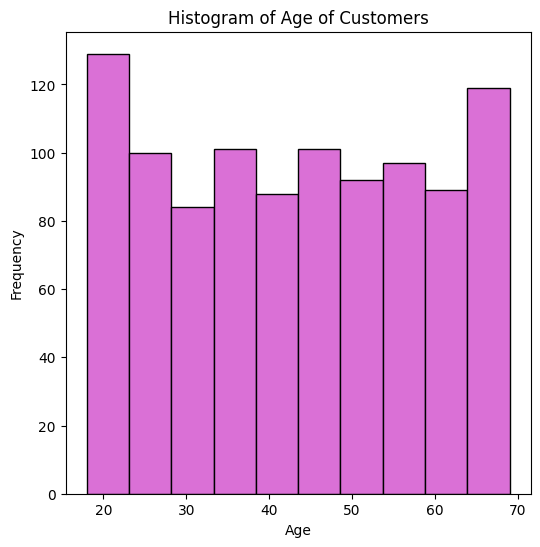

In [13]:
# data visualization is the main part before training the model,Because we can detect the outliers or data was cleaned or not.
# here we checking the histogram of age column, so, by this we can see how many cetain group of age pepole are there.
plt.figure(figsize=(6,6))
plt.hist(df['Age'],color='orchid',edgecolor='black')
plt.title('Histogram of Age of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [13]:
categoricals=df.select_dtypes(include=['object','bool','category']).columns.to_list
categoricals # this is the way to find categoricals columns in a dataset

<bound method IndexOpsMixin.tolist of Index(['Gender', 'Email_Opt_In', 'Promotion_Response', 'Target_Churn'], dtype='object')>

In [14]:
numericals=df.select_dtypes(include=['int64','float64']).columns.to_list
numericals

<bound method IndexOpsMixin.tolist of Index(['Customer_ID', 'Age', 'Annual_Income', 'Total_Spend',
       'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount',
       'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score',
       'Last_Purchase_Days_Ago'],
      dtype='object')>

In [15]:
categorical=['Gender', 'Email_Opt_In', 'Promotion_Response', 'Target_Churn']
#so,here we store all the categorical columns like gender,email_opt_in,promotion_response,target_churn into categorical variable 
numerics=[]
for i in df.columns:
    if i not in categorical:
        numerics +=[i]

In [16]:
numerics

['Customer_ID',
 'Age',
 'Annual_Income',
 'Total_Spend',
 'Years_as_Customer',
 'Num_of_Purchases',
 'Average_Transaction_Amount',
 'Num_of_Returns',
 'Num_of_Support_Contacts',
 'Satisfaction_Score',
 'Last_Purchase_Days_Ago']

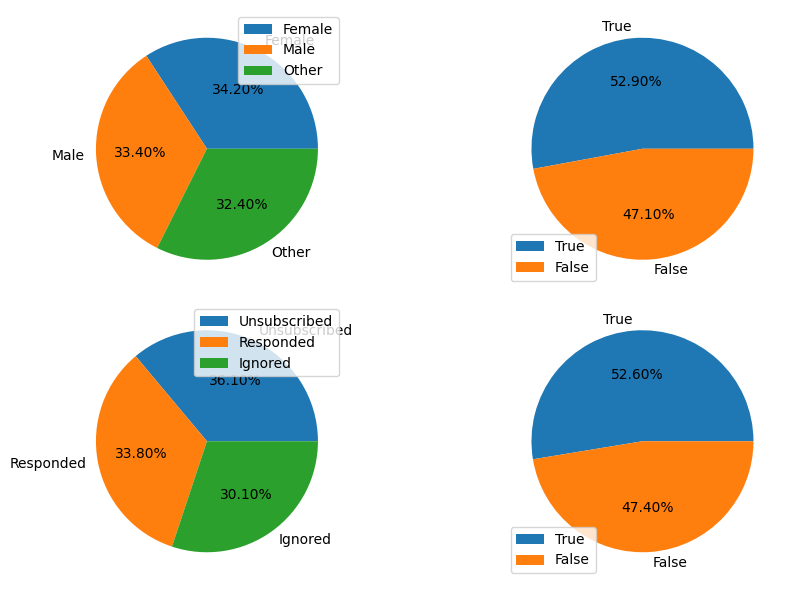

In [18]:
# here we are checking all our categorical columns in pie chart form.
# so, we can analyze this categorical columns and what values are present.
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
index=0
for i in range(2):
    for j in range(2):
        counts=df[categorical[index]].value_counts()
        axes[i][j].pie(counts,autopct="%0.2f%%", labels=counts.index)
        axes[i][j].legend(counts.index)
        index+=1
plt.tight_layout()
plt.show()

In [17]:
import warnings
warnings.filterwarnings("ignore")

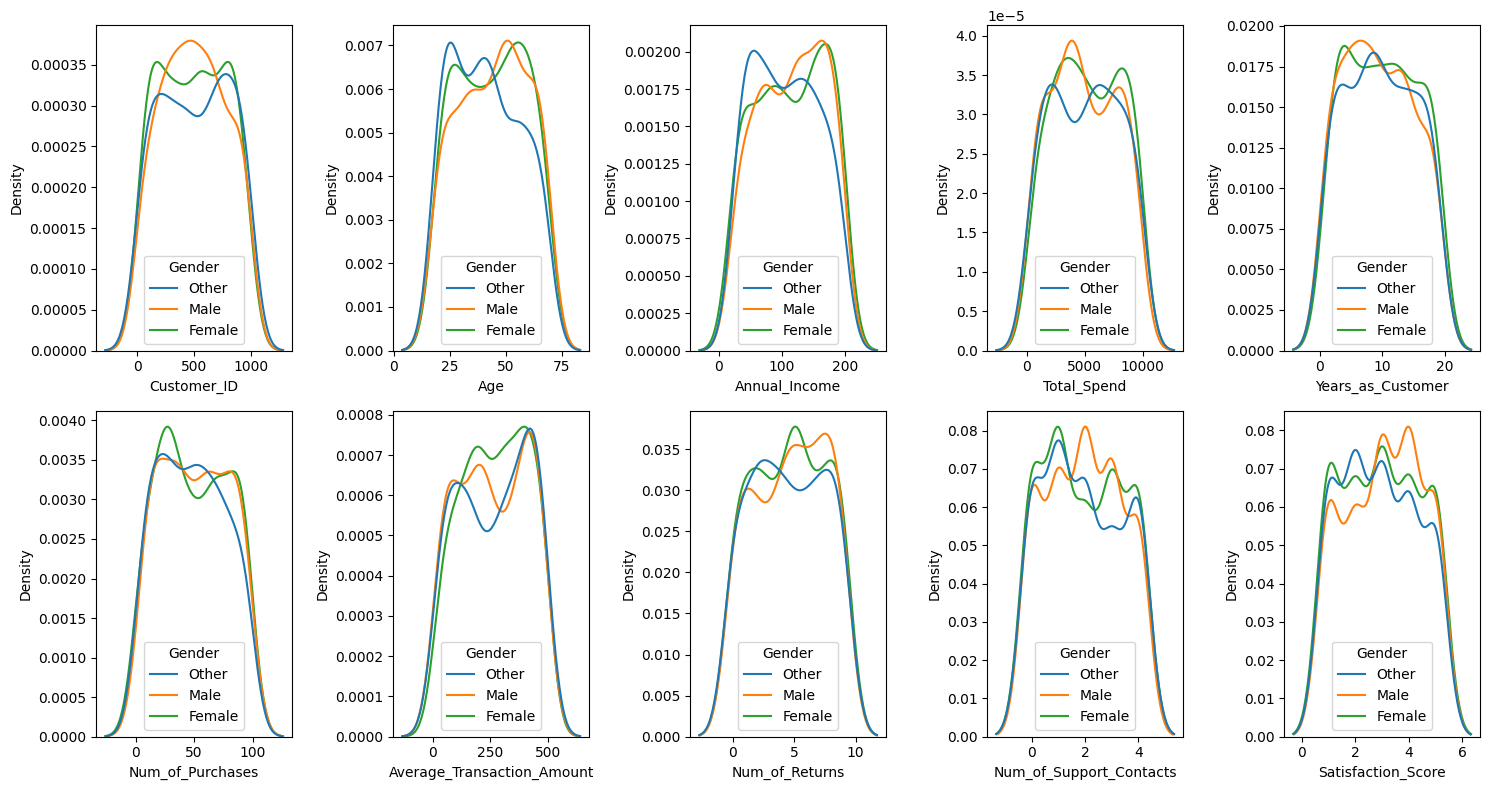

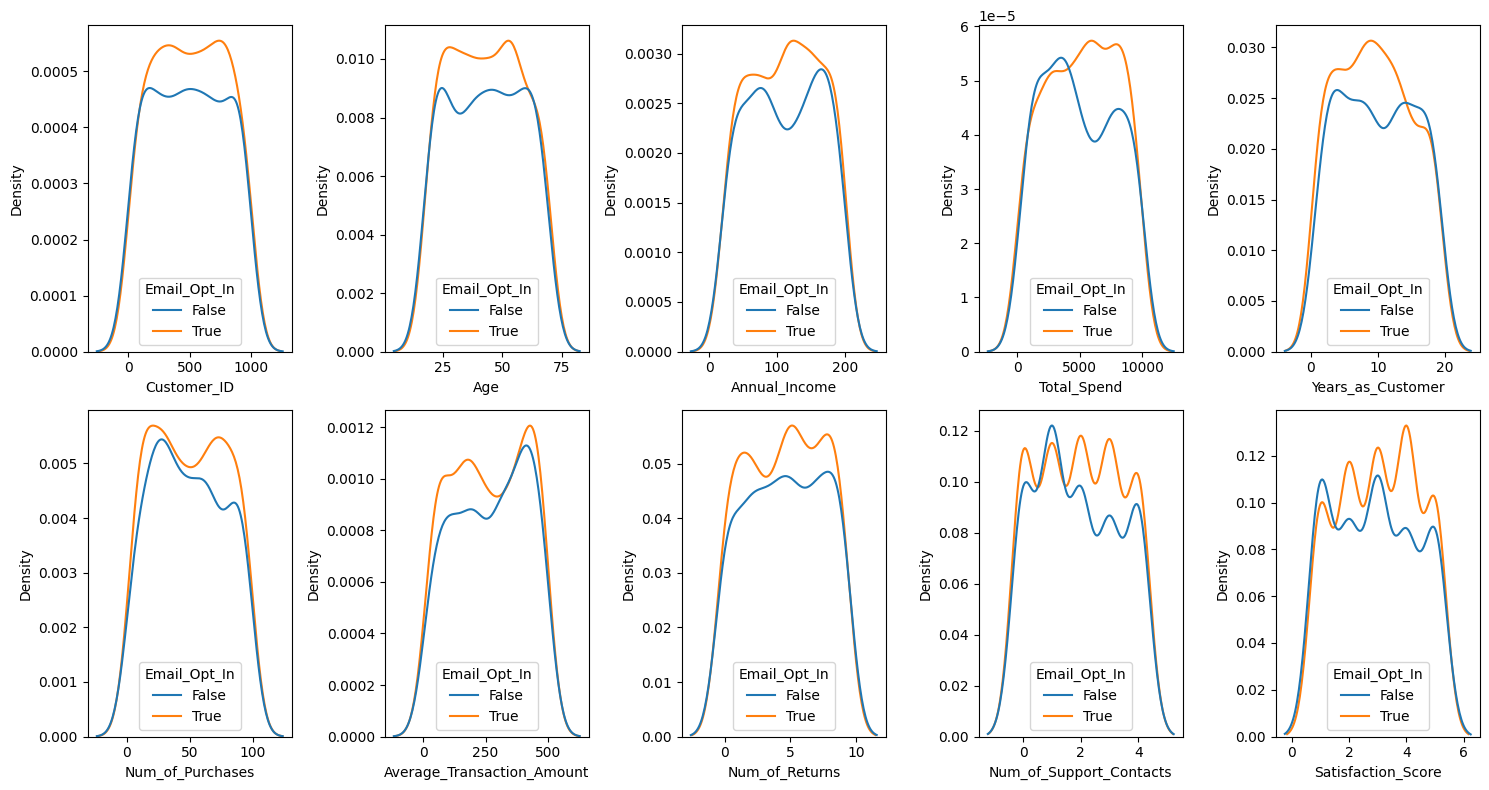

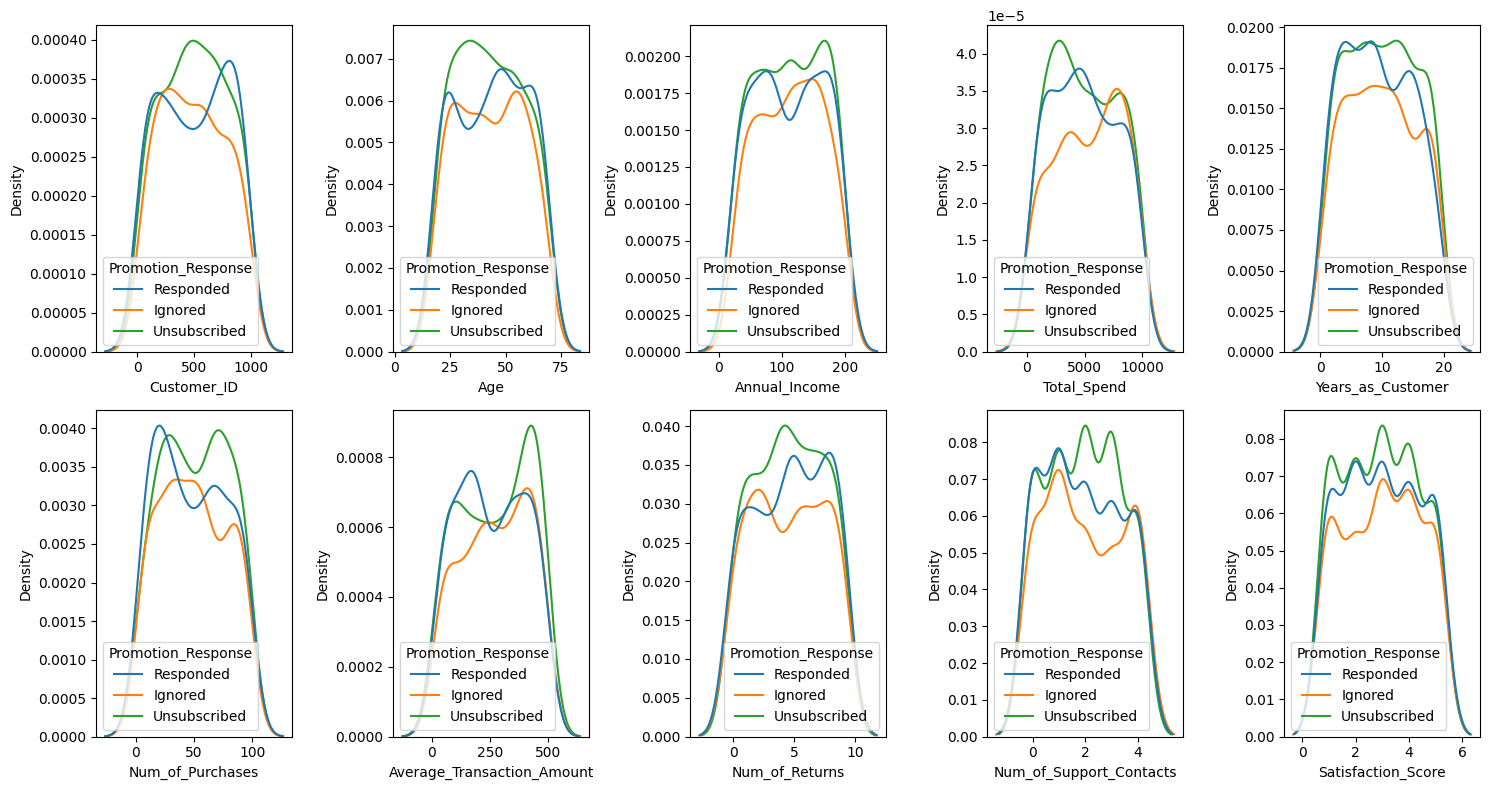

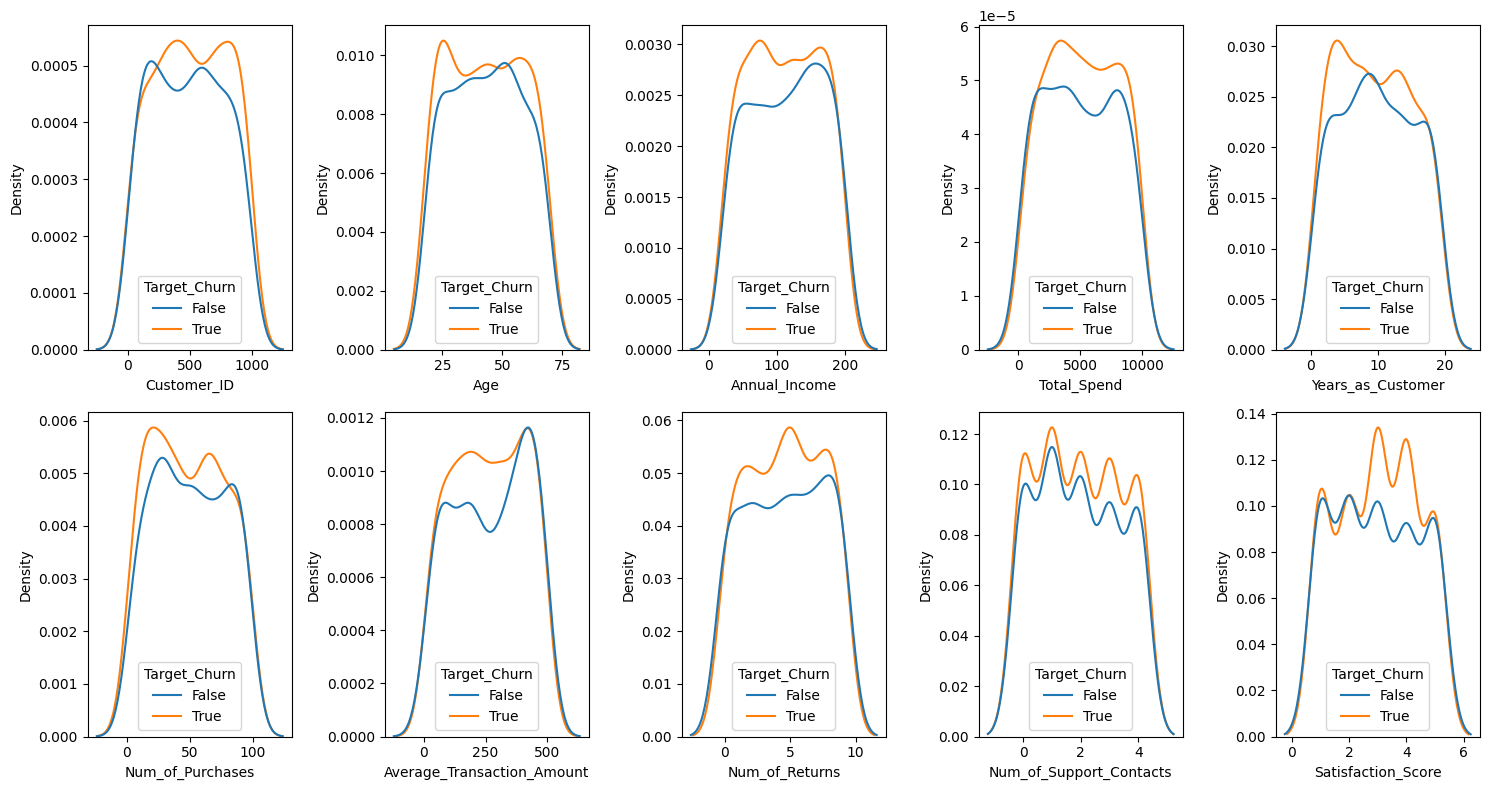

In [19]:
import warnings
warnings.filterwarnings("ignore")
for i in categorical:
    index=0
#this is the kde plot it means,it combines categorical * numerical.for example,categorical column gender * all the numerical cols
    fig,axes = plt.subplots(nrows=2, ncols=5, figsize=(15,8))
    for j in range(2):
        for k in range(5):
            sns.kdeplot(df, x=numerics[index], hue=i, ax=axes[j][k])
            index += 1
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Plot of Gender')

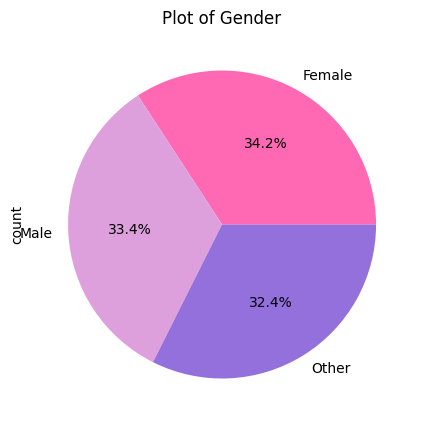

In [20]:
colors = ['hotpink','plum','mediumpurple']
gender = df['Gender'].value_counts()
gender.plot(kind='pie',figsize=(5,5), colors=colors, autopct="%1.1f%%")
plt.title('Plot of Gender')
# here we can see our gender column , so, by this pie-chart we can visualize how much percent male,female,other was present

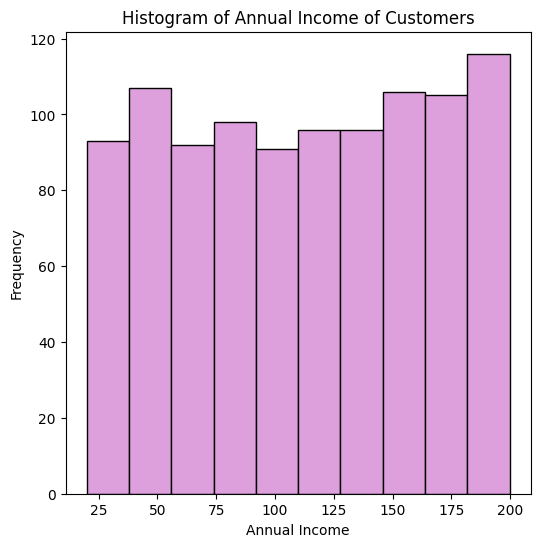

In [21]:
plt.figure(figsize=(6,6))
plt.hist(df['Annual_Income'], color='plum', edgecolor='black')
plt.title("Histogram of Annual Income of Customers")
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

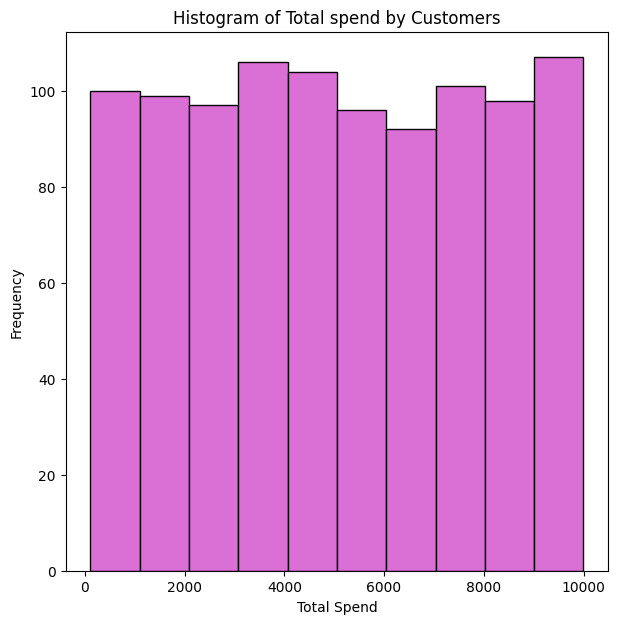

In [22]:
plt.figure(figsize=(7,7))
plt.hist(df['Total_Spend'], color='orchid', edgecolor='black')
plt.title('Histogram of Total spend by Customers')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Plot of Years as Customer')

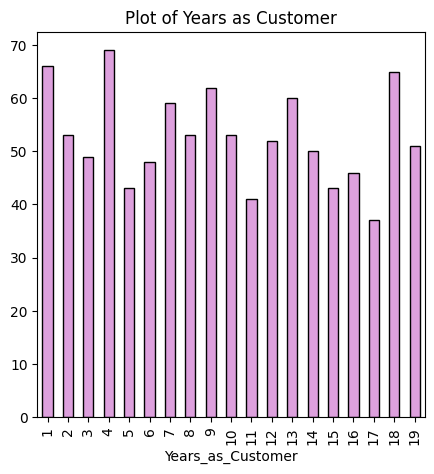

In [23]:
customer_years = df['Years_as_Customer'].value_counts().sort_index()
customer_years.plot(kind='bar', color= ['plum'], edgecolor='black',figsize=(5,5))
plt.title('Plot of Years as Customer')

Text(0.5, 1.0, 'Plot of Satisfaction Score')

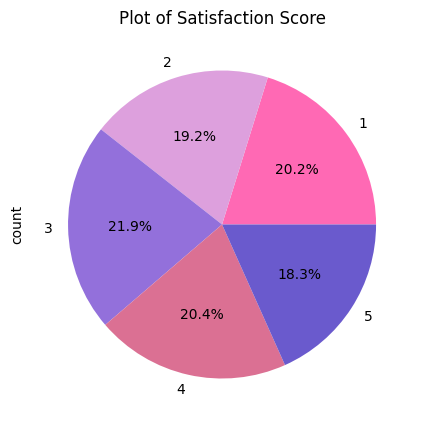

In [24]:
colors = ['hotpink','plum', 'mediumpurple', 'palevioletred', 'slateblue']
score = df['Satisfaction_Score'].value_counts().sort_index()
score.plot(kind = 'pie', figsize = (5,5), colors=colors, autopct='%1.1f%%')
plt.title('Plot of Satisfaction Score')

Text(0.5, 1.0, 'Plot of Target Churn')

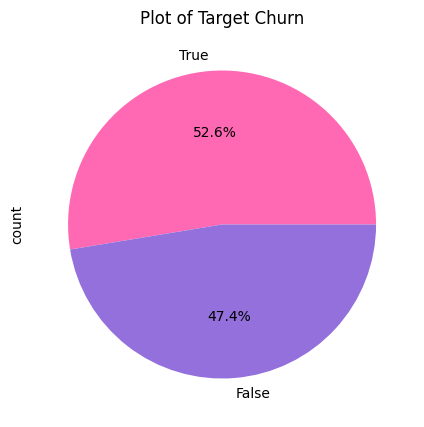

In [25]:
colors = ['hotpink','mediumpurple']
churn = df['Target_Churn'].value_counts()
churn.plot(kind = 'pie', figsize = (5,5), colors=colors, autopct='%1.1f%%')
plt.title('Plot of Target Churn')

# Step 4: Feature Engineering and Data Processing

In [18]:
from sklearn.preprocessing import LabelEncoder
# this is the main part feature engineering and data processing
# Handling Categorical Variables, it means convert categorical columns like gender,promotion_response,emai_opt_in,target_churn into numerical values

In [19]:
columns=['Gender','Email_Opt_In','Promotion_Response','Target_Churn']
label_encoder = LabelEncoder()
for col in columns:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])
# by using label encoding we can convert this categorical columns into numerical values 0,1

In [20]:
df.head() # below we can see the encoded columns at last

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn,Gender_encoded,Email_Opt_In_encoded,Promotion_Response_encoded,Target_Churn_encoded
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True,2,1,1,1
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False,1,0,1,0
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True,1,0,1,1
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True,2,1,0,1
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False,2,0,2,0


In [21]:
# now we have to drop our original columns after adding encoded columns
df = df.drop(columns=columns)

In [22]:
df.head() # now we can see the encoded columns only after dropping original categorical columns

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Gender_encoded,Email_Opt_In_encoded,Promotion_Response_encoded,Target_Churn_encoded
0,1,62,45.15,5892.58,5,22,453.80,2,0,3,129,2,1,1,1
1,2,65,79.51,9025.47,13,77,22.90,2,2,3,227,1,0,1,0
2,3,18,29.19,618.83,13,71,50.53,5,2,2,283,1,0,1,1
3,4,21,79.63,9110.30,3,33,411.83,5,3,5,226,2,1,0,1
4,5,21,77.66,5390.88,15,43,101.19,3,0,5,242,2,0,2,0


In [23]:
# this is the main step before training the model with data.
#so, here we have divided X(it means feature_variables) and Y(it means Class_variables)
# Define top features
top_features = [
    'Total_Spend',
    'Annual_Income',
    'Last_Purchase_Days_Ago',
    'Average_Transaction_Amount',
    'Age',
    'Num_of_Purchases'
]

# Filter your dataset
X = df[top_features]
Y = df['Target_Churn_encoded']  # or your target column name


In [24]:
X # so, this are our X(it means feature_variables)

,Total_Spend,Annual_Income,Last_Purchase_Days_Ago,Average_Transaction_Amount,Age,Num_of_Purchases
0,5892.58,45.15,129,453.80,62,22
1,9025.47,79.51,227,22.90,65,77
2,618.83,29.19,283,50.53,18,71
3,9110.30,79.63,226,411.83,21,33
4,5390.88,77.66,242,101.19,21,43
...,...,...,...,...,...,...
995,1089.09,143.72,88,77.75,54,29
996,3700.24,164.19,352,34.45,19,90
997,705.85,113.31,172,187.37,47,69
998,3891.60,72.98,55,483.80,23,31


In [25]:
Y #so,this are our Y(it means Class_variables)

0      1
1      0
2      1
3      1
4      0
      ..
995    0
996    1
997    0
998    1
999    1
Name: Target_Churn_encoded, Length: 1000, dtype: int64

# Step 5: Importing Smote (If dataset was imbalance set to balance)

In [26]:
# smote is used to balance the imbalanced class.
# so, at start we see the Target_churn values(it means our class variables) are slightly imbalanced,
# so, by using slightly imbalanced data we get the problem while training the model,so, we using smote.
# smote add some rows into our dataset to slightly balanced.
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 123)
X_train_balanced , Y_train_balanced = smote.fit_resample(X,Y)
print("Balanced Xtrain Shape:", X_train_balanced.shape)
print("Balanced Ytrain Shape:", Y_train_balanced.shape)

Balanced Xtrain Shape: (1052, 6)
Balanced Ytrain Shape: (1052,)


In [274]:
# pip install --upgrade scikit-learn imbalanced-learn --user

In [27]:
X_train_balanced
# see, here we have 1052 rows, at first our dataset contain 1000 rows but smote add extra 50 rows to get perfectly balanced data

,Total_Spend,Annual_Income,Last_Purchase_Days_Ago,Average_Transaction_Amount,Age,Num_of_Purchases
0,5892.580000,45.150000,129,453.800000,62,22
1,9025.470000,79.510000,227,22.900000,65,77
2,618.830000,29.190000,283,50.530000,18,71
3,9110.300000,79.630000,226,411.830000,21,33
4,5390.880000,77.660000,242,101.190000,21,43
...,...,...,...,...,...,...
1047,9118.056814,118.612822,52,321.576023,43,53
1048,8211.392193,166.616243,69,256.220399,20,27
1049,1952.845647,89.372550,176,364.264203,40,41
1050,4578.055087,97.952919,170,61.003971,46,23


In [28]:
Y_train_balanced

0       1
1       0
2       1
3       1
4       0
       ..
1047    0
1048    0
1049    0
1050    0
1051    0
Name: Target_Churn_encoded, Length: 1052, dtype: int64

In [29]:
Y_train_balanced.value_counts()
# here we can see that target_churn both 0 and 1 are 526 after using smote technique
# before smote we can see target_churn  of 0 contains 526 and 1 contains 474 

Target_Churn_encoded
1    526
0    526
Name: count, dtype: int64

# Step 6: Splitting the data into training data and testing data

In [30]:
# this is the main step before going into the model
# here we using train_test_split to split our data into training data and testing data.
# so, for training data we have X and Y values .so, for testing data also we have X and Y values.
# But we divided 80% into training data and 20% into testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_train_balanced, Y_train_balanced, random_state = 42, test_size=0.2)

In [31]:
x_train.shape

(841, 6)

In [32]:
y_train.shape

(841,)

In [33]:
x_test.shape

(211, 6)

In [34]:
y_test.shape

(211,)

# Step 7: Feature Scaling(Normalization/Standardization)

In [35]:
from sklearn.preprocessing import StandardScaler
# Since your dataset has numerical features with different ranges, you should scale them to ensure a fair comparison.
# You can use StandardScaler (for standardization) or MinMaxScaler (for normalization) from sklearn.preprocessing:
# This helps machine learning models work better, especially those based on distance calculations
# (like k-NN, SVM, and Logistic Regression).

In [36]:
scaler = StandardScaler()
X_Scaled_train = scaler.fit_transform(x_train)
X_Scaled_test= scaler.transform(x_test)

In [38]:
X_Scaled_train

array([[ 0.14970125, -0.74725341,  1.56497339, -1.01248213,  1.08504667,
         0.00751436],
       [ 0.26011359, -1.67451133,  0.90175728,  0.57565922, -0.64877608,
         0.1495273 ],
       [-1.65452361,  0.7414741 , -0.1320796 , -0.83346381, -0.04860667,
         0.29154023],
       ...,
       [ 0.09861469, -1.68536098,  0.72620007,  1.1176084 ,  1.08504667,
        -1.05758267],
       [-0.39703079, -0.33936485,  0.72620007, -0.25243145,  0.48487726,
         0.57556611],
       [-0.63786174,  0.22320938,  1.14558673, -0.5950944 , -0.91551804,
        -0.31201475]])

In [39]:
pd.DataFrame(X_Scaled_train)

,0,1,2,3,4,5
0,0.149701,-0.747253,1.564973,-1.012482,1.085047,0.007514
1,0.260114,-1.674511,0.901757,0.575659,-0.648776,0.149527
2,-1.654524,0.741474,-0.132080,-0.833464,-0.048607,0.291540
3,-0.143873,1.112106,0.716447,0.897644,0.884990,-1.235099
4,-1.100937,-0.651156,1.252872,1.565533,-1.582373,-1.661138
...,...,...,...,...,...,...
836,-1.419900,1.466851,1.594233,-0.331565,-0.515405,-1.590131
837,-0.141575,0.679864,-1.468265,-1.631843,1.685216,-1.164092
838,0.098615,-1.685361,0.726200,1.117608,1.085047,-1.057583
839,-0.397031,-0.339365,0.726200,-0.252431,0.484877,0.575566


In [40]:
X_Scaled_test

array([[-1.33139985,  1.2725259 ,  0.37508566,  0.16826674, -0.71546157,
         0.61106934],
       [-1.27404729,  1.58677838, -0.07356053, -0.67767582,  0.75161922,
        -1.19959561],
       [ 0.63342828, -1.07952406, -0.96109974, -1.3238513 ,  1.41847412,
        -1.09308591],
       ...,
       [ 0.55180942, -1.23916896,  0.01421807, -1.15696515, -1.18226   ,
        -1.16409238],
       [ 0.8483928 ,  1.03363977,  0.02397125, -0.62094418, -1.51568745,
         1.32113403],
       [-0.69419621,  1.64044542,  1.45768843, -1.21638517,  0.55156275,
         1.49865021]])

In [41]:
pd.DataFrame(X_Scaled_test)

,0,1,2,3,4,5
0,-1.331400,1.272526,0.375086,0.168267,-0.715462,0.611069
1,-1.274047,1.586778,-0.073561,-0.677676,0.751619,-1.199596
2,0.633428,-1.079524,-0.961100,-1.323851,1.418474,-1.093086
3,1.596611,0.759492,-0.922087,-1.616678,-1.515687,0.611069
4,-0.467312,0.177098,-0.561219,0.789420,0.951676,1.250128
...,...,...,...,...,...,...
206,-0.639524,0.956846,-0.414922,0.994759,0.751619,-0.276512
207,1.562345,-0.325473,-1.653575,1.176753,-0.115292,1.640663
208,0.551809,-1.239169,0.014218,-1.156965,-1.182260,-1.164092
209,0.848393,1.033640,0.023971,-0.620944,-1.515687,1.321134


# Step 8: Model Selection and Training

# Naive Bayes

In [1]:
# Here we use the first algorithm Naive Bayes for customer churn prediction

In [42]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X_Scaled_train, y_train)
Nb_model = model_NB.predict(X_Scaled_test)

In [43]:
from sklearn.metrics import accuracy_score
acc_NB = accuracy_score(y_test,Nb_model)

In [44]:
acc_NB

0.5023696682464455

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Nb_model))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50       106
           1       0.50      0.51      0.51       105

    accuracy                           0.50       211
   macro avg       0.50      0.50      0.50       211
weighted avg       0.50      0.50      0.50       211



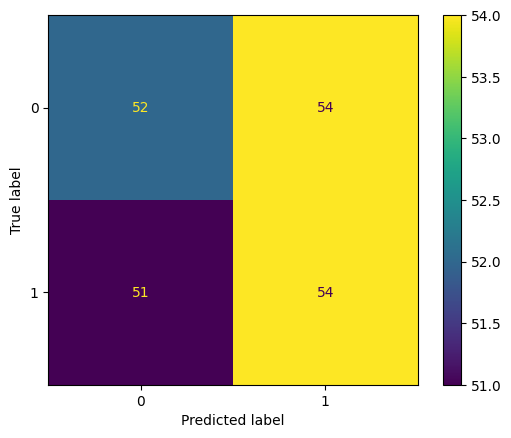

In [46]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm_NB= confusion_matrix(y_test,Nb_model)
disp=ConfusionMatrixDisplay(confusion_matrix = cm_NB,display_labels=model_NB.classes_)
disp.plot()

In [2]:
# after using Naive bayes model we get the low accuracy.so, now we are trying to improve accuracy, we use Gridsearchcv or Randomsearch cv

In [47]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [48]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
gcv_nb=GridSearchCV(model_NB,param_grid,scoring="accuracy",cv=3)
gcv_nb.fit(X_Scaled_train,y_train)

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='accuracy')

In [49]:
gcv_nb.cv_results_

{'mean_fit_time': array([0.00204015, 0.002726  , 0.00400225, 0.00497945]),
 'std_fit_time': array([4.40014175e-05, 8.36825491e-04, 1.73015208e-03, 3.82793180e-03]),
 'mean_score_time': array([0.00282033, 0.00424472, 0.00395091, 0.00069404]),
 'std_score_time': array([0.00089958, 0.00177697, 0.00295913, 0.00098152]),
 'param_var_smoothing': masked_array(data=[1e-09, 1e-08, 1e-07, 1e-06],
              mask=[False, False, False, False],
        fill_value=1e+20),
 'params': [{'var_smoothing': 1e-09},
  {'var_smoothing': 1e-08},
  {'var_smoothing': 1e-07},
  {'var_smoothing': 1e-06}],
 'split0_test_score': array([0.51601423, 0.51601423, 0.51601423, 0.51601423]),
 'split1_test_score': array([0.48571429, 0.48571429, 0.48571429, 0.48571429]),
 'split2_test_score': array([0.54285714, 0.54285714, 0.54285714, 0.54285714]),
 'mean_test_score': array([0.51486189, 0.51486189, 0.51486189, 0.51486189]),
 'std_test_score': array([0.0233427, 0.0233427, 0.0233427, 0.0233427]),
 'rank_test_score': array

In [50]:
best_nb=gcv_nb.best_estimator_
best_nb

GaussianNB()

In [51]:
accuracy_nb=accuracy_score(y_test,best_nb.predict(X_Scaled_test))
accuracy_nb

0.5023696682464455

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV

model = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
gcv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)

gcv.fit(X_Scaled_train, y_train)

print("Best Parameters:", gcv.best_params_)
print("Test Accuracy:", gcv.score(X_Scaled_test, y_test))


Best Parameters: {'var_smoothing': 1e-09}
Test Accuracy: 0.5023696682464455


In [3]:
# After using Naive Bayes model and Naive Bayes with Hyperparameter tunig Gridsearch also getting low accuracy.
# so,that's why we are using the another model Random Forest to improve accuracy and to improve the training to the model

# Random Forest

In [54]:
# this is our model Random Forest, so, here we using Randomforest algorithm to train the data and fit the train data into algorithm
from sklearn.ensemble import RandomForestClassifier
model_RF= RandomForestClassifier()
model_RF.fit(X_Scaled_train,y_train)
RF_model=model_RF.predict(X_Scaled_test)
# here we predict x_test with using our trained randomforest model(model_RF)

In [55]:
from sklearn.metrics import accuracy_score
acc_RF = accuracy_score(y_test,RF_model)
acc_RF
#here we use accuracy_score to see our model performance 

0.5829383886255924

In [107]:
# so, by using random forest we get the accuracy rate was low,

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, RF_model))
# so, here in the classification_report we can see precision,recall,f1-score

              precision    recall  f1-score   support

           0       0.57      0.65      0.61       106
           1       0.59      0.51      0.55       105

    accuracy                           0.58       211
   macro avg       0.58      0.58      0.58       211
weighted avg       0.58      0.58      0.58       211



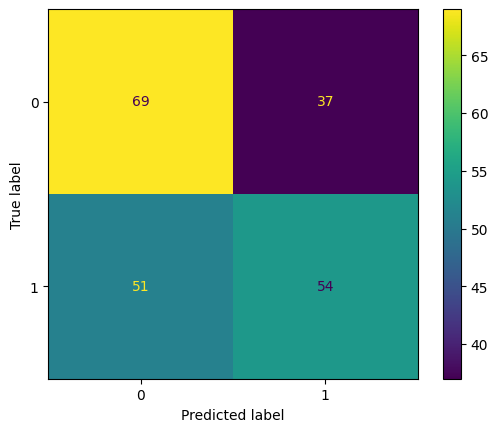

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_RF = confusion_matrix(y_test, RF_model)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_RF, display_labels = model_RF.classes_)
disp.plot()
#so, this is confusion matrix, here we can check our churn values performance.we can it was predicting correct or not

In [8]:
#so, by using random forest we get the good accuracy rate it means our model was  performing good with the training data and
# getting wrong predictions on testing data
# it was better accuracy rate than the Naive bayes
# so, now we are using another model called Logistic regression

# Logistic Regression

In [119]:
# here we using the logistic regression algroithm after random forest algorithm got low accuracy rate

In [59]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
model_LR = linear_model.LogisticRegression()
model_LR.fit(X_Scaled_train, y_train)
LR_model = model_LR.predict(X_Scaled_test)

In [60]:
acc_LR = accuracy_score(y_test, LR_model)
acc_LR

0.5023696682464455

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LR_model))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51       106
           1       0.50      0.50      0.50       105

    accuracy                           0.50       211
   macro avg       0.50      0.50      0.50       211
weighted avg       0.50      0.50      0.50       211



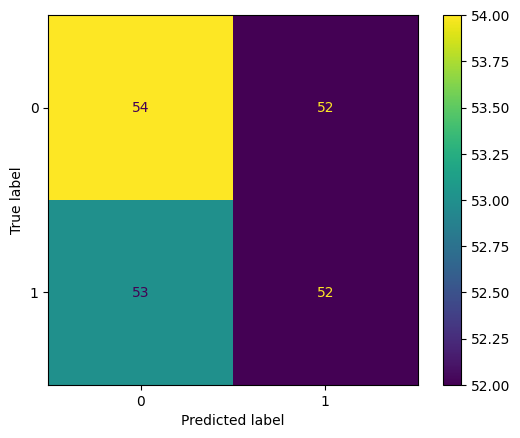

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_LR = confusion_matrix(y_test, LR_model)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_LR, display_labels = model_LR.classes_)
disp.plot()

In [5]:
# after Naive bayes, Random forest, Logistic regression we are using some advance model Decision Tree

# Decision Tree

In [69]:
# this is decision tree model we are using to improve accuracy rate and performance of model
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_Scaled_train, y_train)
DT_model = model_DT.predict(X_Scaled_test)

In [70]:
acc_DT = accuracy_score(y_test, DT_model)
acc_DT

0.5829383886255924

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, DT_model))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       106
           1       0.58      0.56      0.57       105

    accuracy                           0.58       211
   macro avg       0.58      0.58      0.58       211
weighted avg       0.58      0.58      0.58       211



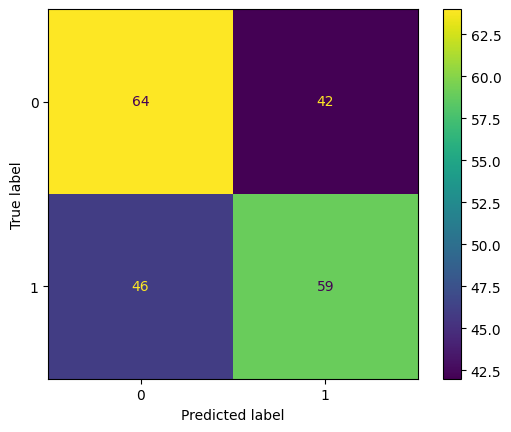

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_DT = confusion_matrix(y_test, DT_model)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_DT, display_labels = model_DT.classes_)
disp.plot()

In [7]:
# so, before Naive bayes, random forest, logisctic regression.Decision tree model gets the better accuracy rate and better performance of the model
# so, we are using some advance topic like Hyperparameter tuning for decision tree to improve little bit accuracy

In [86]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1. Use the final 6 selected features
selected_features = [
    'Total_Spend',
    'Annual_Income',
    'Last_Purchase_Days_Ago',
    'Average_Transaction_Amount',
    'Age',
    'Num_of_Purchases'
]

X1 = df[selected_features]
Y1 = df['Target_Churn_encoded']  # Replace 'Churn' with your target column name

# 2. Optional: Standardize the features
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# 3. Stratified Train-Test Split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(
    X1_scaled, Y1, test_size=0.2, random_state=42, stratify=Y1
)

# 4. Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# 5. Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt','log2']
}

# 6. Setup GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# 7. Fit the model
grid_search.fit(X1_train, Y1_train)

# 8. Evaluate best model
print("Best Parameters:", grid_search.best_params_)

best_dt = grid_search.best_estimator_
Y1_pred = best_dt.predict(X1_test)

print("Test Accuracy:", accuracy_score(Y1_test, Y1_pred))
print("Classification Report:\n", classification_report(Y1_test, Y1_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.515
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.52      0.50        95
           1       0.54      0.51      0.53       105

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.52       200



In [9]:
# so, decision tree model was get the accuracy same as random forest. but we are trying to do another model to improve accuracy

# K Nearest Neighbor

In [73]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_Scaled_train,y_train)
    pred_i = knn.predict(X_Scaled_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

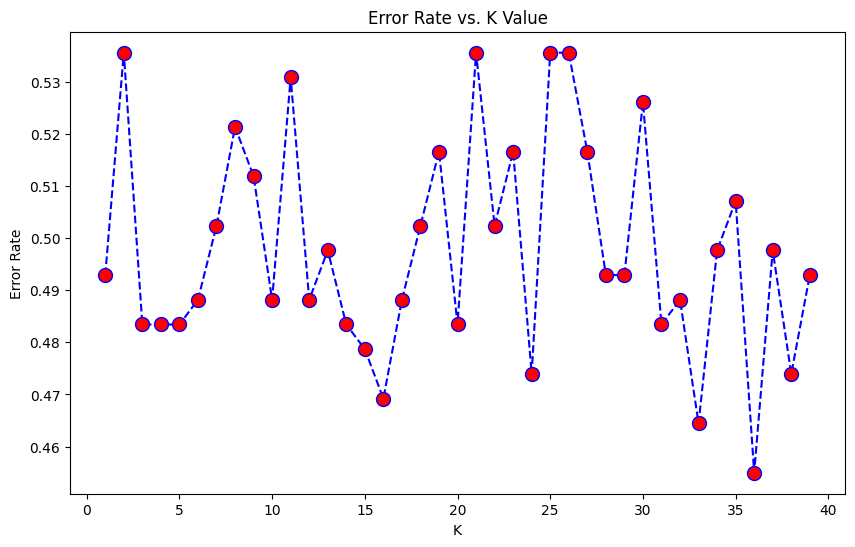

In [74]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Maximum accuracy: 0.5450236966824644 at K = 36


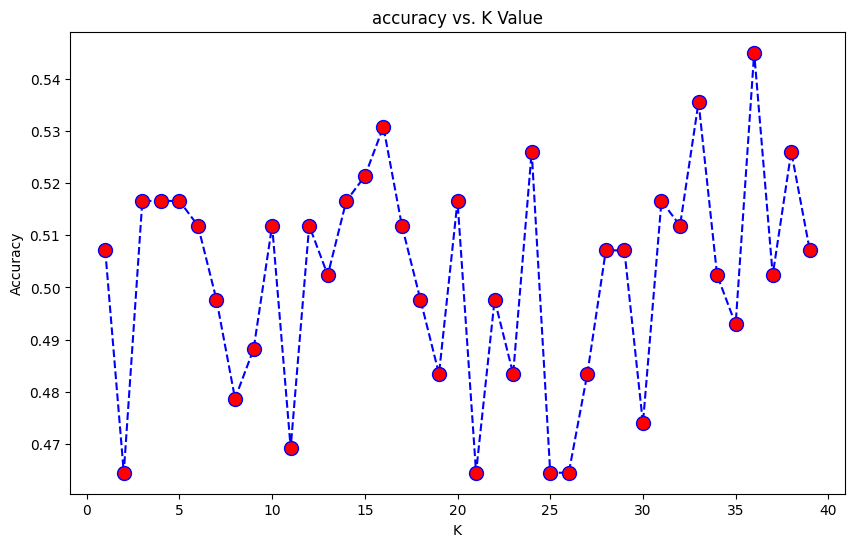

In [76]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_Scaled_train,y_train)
    yhat = neigh.predict(X_Scaled_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
max_accuracy = max(acc)
optimal_k_value = acc.index(max_accuracy) + 1
print("Maximum accuracy:",max_accuracy,"at K =", optimal_k_value)

In [79]:
knn = KNeighborsClassifier(n_neighbors=13)
model_KNN = knn.fit(X_Scaled_train, y_train)
KNN_model = knn.predict(X_Scaled_test)

In [80]:
acc_KNN = accuracy_score(y_test, KNN_model)
acc_KNN

0.5023696682464455

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, KNN_model))

              precision    recall  f1-score   support

           0       0.50      0.53      0.52       106
           1       0.50      0.48      0.49       105

    accuracy                           0.50       211
   macro avg       0.50      0.50      0.50       211
weighted avg       0.50      0.50      0.50       211



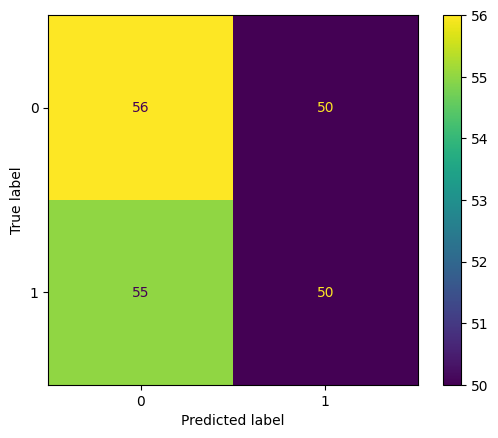

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_KNN = confusion_matrix(y_test, KNN_model)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_KNN, display_labels = model_KNN.classes_)
disp.plot()

In [10]:
# KNN also not getting the good accuracy rate

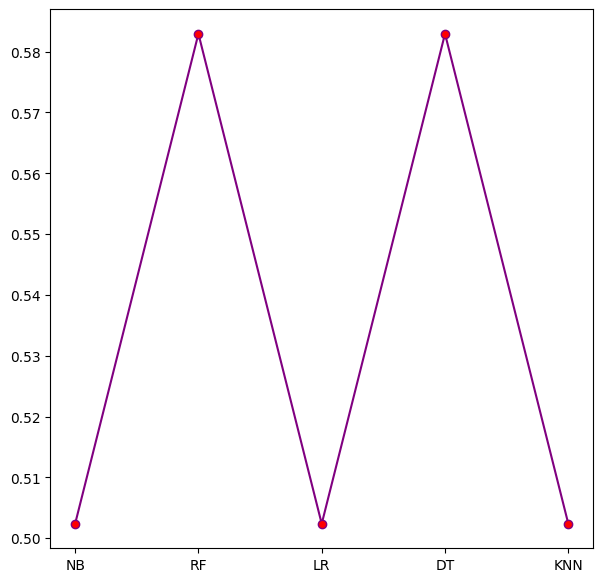

In [83]:
plt.rcParams["figure.figsize"] = [7,7]
acc = [acc_NB, acc_RF, acc_LR, acc_DT, acc_KNN]
models = ['NB', 'RF', 'LR', 'DT', 'KNN']

plt.plot(models,acc, color = 'purple', marker = 'o', markerfacecolor = 'red')
plt.grid(False)
plt.show()

In [ ]:
#so, by using all the models only Random Forest and Decision Tree are getting the better accuracy.and predicting the data better.

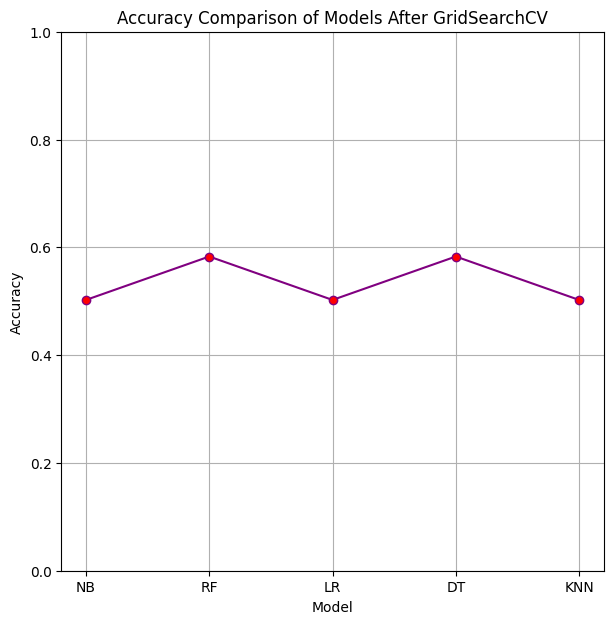

In [89]:
import matplotlib.pyplot as plt

# Plotting GridSearchCV accuracy comparison
plt.rcParams["figure.figsize"] = [7, 7]

acc = [accuracy_nb, acc_RF, acc_LR, acc_DT, acc_KNN]
models = ['NB', 'RF', 'LR', 'DT', 'KNN']

plt.plot(models, acc, color='purple', marker='o', markerfacecolor='red')
plt.title("Accuracy Comparison of Models After GridSearchCV")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.grid(True)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()


In [11]:
# so, between the Random forest and decision tree i choose decision_tree model.
# so, save the model using joblib

In [90]:
import joblib

# Save the trained model
joblib.dump(model_DT, 'decision_tree_model.pkl')
# we use joblib to save the model

['decision_tree_model.pkl']

In [91]:
import os
print(os.path.exists('decision_tree_model.pkl'))
# we just confirming our model was saved or not

True


# Step 8: Model Evaluation and testing the model

In [12]:
# so, we import the new file to predict the model was giving the correct results or not

In [119]:
df_1=new_data=pd.read_csv(r"C:\Users\SAI\Downloads\Book1.csv")
df_1

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response
0,101,30,Female,55.2,3050.70,4,25,122.03,1,1,4,95,True,Responded
1,102,47,Male,88.1,7512.30,9,65,115.57,0,0,5,60,False,Unsubscribed
2,103,22,Female,34.5,1295.65,2,15,86.38,2,2,2,180,True,Responded
3,104,60,Male,72.0,9850.55,12,80,123.13,3,1,3,210,False,Ignored
4,105,33,Other,45.8,4320.45,6,30,144.02,2,2,4,75,True,Responded
5,106,41,Female,67.4,6123.70,8,40,153.09,0,1,4,120,True,Responded
6,107,27,Male,39.9,1570.25,3,18,87.24,1,0,3,165,False,Ignored
7,108,53,Female,92.3,10450.10,10,95,110.00,4,3,5,30,True,Responded
8,109,38,Other,58.6,4200.40,7,34,123.53,3,1,2,195,False,Unsubscribed
9,110,45,Male,80.0,8695.35,11,70,124.22,0,1,4,55,True,Responded


In [120]:
columns=['Gender','Email_Opt_In','Promotion_Response']
label_encoder=LabelEncoder()
for col in columns:
    df_1[col + '_encoded'] = label_encoder.fit_transform(df_1[col])

In [121]:
df_1=df_1.drop(columns=columns)

In [122]:
df_1=df_1.drop(columns=["Customer_ID"])

In [123]:
cols_to_drop = [
    "Years_as_Customer", 
    "Num_of_Returns", 
    "Num_of_Support_Contacts", 
    "Satisfaction_Score", 
    "Gender_encoded", 
    "Email_Opt_In_encoded", 
    "Promotion_Response_encoded"
]

# Drop only the columns that exist in df_1
df_1 = df_1.drop(columns=[col for col in cols_to_drop if col in df_1.columns])


In [124]:
df_1

,Age,Annual_Income,Total_Spend,Num_of_Purchases,Average_Transaction_Amount,Last_Purchase_Days_Ago
0,30,55.2,3050.70,25,122.03,95
1,47,88.1,7512.30,65,115.57,60
2,22,34.5,1295.65,15,86.38,180
3,60,72.0,9850.55,80,123.13,210
4,33,45.8,4320.45,30,144.02,75
5,41,67.4,6123.70,40,153.09,120
6,27,39.9,1570.25,18,87.24,165
7,53,92.3,10450.10,95,110.00,30
8,38,58.6,4200.40,34,123.53,195
9,45,80.0,8695.35,70,124.22,55


In [125]:
scaler = StandardScaler()
df_1= pd.DataFrame(scaler.fit_transform(df_1))

In [126]:
df_1

,0,1,2,3,4,5
0,-0.845758,-0.431225,-0.840609,-0.833057,0.154916,-0.381710
1,0.651938,1.303163,0.571332,0.667947,-0.166975,-0.950215
2,-1.550555,-1.522466,-1.396021,-1.208308,-1.621466,0.998944
3,1.797235,0.454420,1.311307,1.230823,0.209728,1.486234
4,-0.581458,-0.926764,-0.438777,-0.645432,1.250643,-0.706570
5,0.123340,0.211922,0.131888,-0.270181,1.702586,0.024364
6,-1.110057,-1.237794,-1.309120,-1.095733,-1.578613,0.755299
7,1.180537,1.524574,1.501044,1.793700,-0.444519,-1.437505
8,-0.140960,-0.251987,-0.476769,-0.495331,0.229659,1.242589
9,0.475739,0.876156,0.945726,0.855572,0.264041,-1.031430


In [13]:
# as we know we save the decision tree model into joblib

In [127]:
model = joblib.load('decision_tree_model.pkl')

In [128]:
predictions=model.predict(df_1)

In [14]:
# so, now we predict the model with the new data we have taken

In [308]:
df_1['Predicted_Churn'] = predictions
print(df_1[['Predicted_Churn']])

   Predicted_Churn
0                1
1                1
2                1
3                1
4                1
5                1
6                1
7                1
8                1
9                1


In [15]:
# so, we get the prediction results of the new data we have given to predict with the decision tree model

In [130]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_true = df['Target_Churn_encoded']                  # Actual values
y_pred = predictions              # Model predictions

In [131]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Actual target values for the unseen data (should match the 10 predictions)
y_true = df.loc[df_1.index, 'Target_Churn_encoded']  # Only select matching rows

# Step 2: Model predictions
y_pred = predictions

# Step 3: Evaluate
print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))


Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.33      0.25      0.29         4

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45        10
weighted avg       0.48      0.50      0.48        10


Confusion Matrix:
 [[4 2]
 [3 1]]


In [16]:
# this is the accuracy of predictions between the model and the new data 

In [144]:
import joblib

# Save model
joblib.dump(model, "decision_tree_model.pkl")


['decision_tree_model.pkl']

In [145]:
# Save scaler if used
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [146]:
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [150]:
import shutil

shutil.move("decision_tree_model.pkl", r"C:\Users\SAI\OneDrive\Desktop\ChurnPredictionProjectApp\decision_tree_model.pkl")


'C:\\Users\\SAI\\OneDrive\\Desktop\\ChurnPredictionProjectApp\\decision_tree_model.pkl'

In [151]:
shutil.move("scaler.pkl", r"C:\Users\SAI\OneDrive\Desktop\ChurnPredictionProjectApp\scaler.pkl")
shutil.move("label_encoder.pkl", r"C:\Users\SAI\OneDrive\Desktop\ChurnPredictionProjectApp\label_encoder.pkl")
shutil.move("features.pkl", r"C:\Users\SAI\OneDrive\Desktop\ChurnPredictionProjectApp\features.pkl")

'C:\\Users\\SAI\\OneDrive\\Desktop\\ChurnPredictionProjectApp\\features.pkl'

In [17]:
# here we have use shutil library to store our model, features, scalers, label_encoders, into the folder churnpredictionprojectapp

In [164]:
import joblib

# Define your features list in the exact order you want
features_cols = [
    "Age",
    "Annual_Income",
    "Total_Spend",
    "Num_of_Purchases",
    "Average_Transaction_Amount",
    "Last_Purchase_Days_Ago"
]

# Save to features.pkl
joblib.dump(features_cols, 'features1.pkl')
print("features.pkl file saved successfully!")


features.pkl file saved successfully!


In [18]:
# feature_cols these are the columns should we use to predict the results, if we add rather than these columns the model will not predict the result.

In [165]:
shutil.move("features1.pkl", r"C:\Users\SAI\OneDrive\Desktop\ChurnPredictionProjectApp\features1.pkl")

'C:\\Users\\SAI\\OneDrive\\Desktop\\ChurnPredictionProjectApp\\features1.pkl'

In [166]:
features_cols

['Age',
 'Annual_Income',
 'Total_Spend',
 'Num_of_Purchases',
 'Average_Transaction_Amount',
 'Last_Purchase_Days_Ago']